# Classification and K-Nearest Neighbor

In this notebook, we will cover two main topics:
1. Classification
2. K-Nearest Neighbor

## 1. Classification

Given an input X, we consider the output or prediction $Y$. The output $Y$ is a category, while $X$ can take any value: numeric or categorical.

**Classification** is the task of assigning objects to a category from a predefined set of categories.

### Discrete Values

**Discrete values** are values that can take on only a finite number of distinct values. These values are typically counted and not measured. Examples of discrete values include:
- Number of students in a class (e.g., 25, 30)
- Days of the week (e.g., Monday, Tuesday)
- Categories like "red," "blue," and "green"
- Binary ("True", "False") or ("0", "1")

### Definition of Classification

- Given a set of records, considered as a training set.
- Each record is characterized by a tuple (x, y):
  - x is the attribute, predictor, independent variable, input.
  - y is the class label, response, dependent variable, output.

**Objective**: Define a model that maps each set of attributes $X$ to one of the predefined class labels.


### Classification vs Clustering

**Classification**: In classification, we predict a value $y$ and the labels are known beforehand. We train the model using labeled data to predict the labels of new instances.

**Clustering**: In clustering, the labels of $y$ are unknown, and the result to be achieved is not predefined. Clustering groups similar data points together based on their features.

### Classification Models: Descriptive vs Predictive

- **Descriptive**:
  - The model serves as a tool to distinguish objects of different classes.
- **Predictive**:
  - The model is used to predict the class label of unknown objects.

### Classification Techniques

**Basic Classifiers**:
- Decision Tree based Methods
- Rule-based Methods
- Nearest-neighbor
- Naive Bayes and Bayesian Belief Networks
- Support Vector Machines

**Ensemble Classifiers**:
- Boosting
- Bagging
- Random Forests

### Basic vs Ensemble Classification

**Basic Classification**: In basic classification, we have a single model that gives a prediction.

**Ensemble Classification**: In ensemble classification, we have multiple models, and the final prediction is the majority predictor (the one most predicted). Random Forest is an example of ensemble classification. There are different types of ensemble classifiers:
- **Parallel Ensembles**: Multiple models are built independently and their predictions are combined.
- **Series Ensembles**: Models are built sequentially, where each model attempts to correct the errors of the previous one.


## 2. K-Nearest Neighbor Classifier

### Objective

The goal is to find the training data point closest to the test data point and classify the test instance as being of the same class.

### k-Nearest Neighbor Classifier

**Objective**: Find the $k$ training instances that are closest to the test data point and classify the test instance as being of the same class as the majority class of the k instances.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate more complex data
np.random.seed(42)  # For reproducibility
n_points = 100

# Generate labels for the two classes
labels = np.random.choice(['Effect', 'No effect'], size=n_points)

# Generate fictitious data associated with closer centers for each class
data = []
for label in labels:
    if label == 'Effect':
        point = np.random.normal(loc=[3, 3, 3], scale=3.0, size=3)  # Center around [3, 3, 3]
    else:
        point = np.random.normal(loc=[0, 0, 0], scale=3.0, size=3)  # Center around [0, 0, 0]
    data.append(point)

data = np.array(data)

# Create the DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])
df['Class'] = labels

# Prepare the data for KNN
X = df[['Feature1', 'Feature2', 'Feature3']]
y = df['Class']

### Choosing k

- The choice of $k$ is not straightforward due to the nature of the algorithm.
- If $k$ is very small, there is a risk of overfitting due to noise in the training data.
- If $k$ is too large, there is a risk of misclassification because the neighborhood of the test instance becomes larger and distant, irrelevant points may be used for classification.


In [53]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### Class Voting

Take the class labels of the k nearest neighbors and assign the majority class:

> $y = \underset{v}{\operatorname{argmax}} \sum_{(x_i, y_i) \in D_z} I(v = y_i)$

where:
- v: a class label.
- $y_i$: class label of neighbor i.
- $I(.)$: indicator function that returns 1 if the argument is True and 0 otherwise.

### Alternative

We can modify the voting rule by weighting the influence of neighbors according to their distance:

>$y = \underset{v}{\operatorname{argmax}} \sum_{(x_i, y_i) \in D_z} w_i \cdot I(v = y_i)$

where the weight

>$w_i = \frac{1}{d(x', x_i)^2}$.


## Metrics and Evaluation of a Classification Model

### Confusion Matrix and Error Types

**Confusion Matrix**: A table used to evaluate the performance of a classification model. It compares the predicted labels with the actual labels.

- **Type 1 Error (False Positive)**: The model incorrectly predicts the positive class.
- **Type 2 Error (False Negative)**: The model incorrectly predicts the negative class.

### Hypothesis Testing Example

> $H_0$ : The vaccine has an effect.


> $H_1$ : The vaccine does not have an effect.

| **Actual \\ Predicted** | **Positive** | **Negative** |
|---------------------|----------|----------|
| **Positive**            | True Positive (TP) | False Negative (FN) |
| **Negative**            | False Positive (FP) | True Negative (TN) |


- **True Positive (TP)**: The model correctly predicts the positive class. In the example, this means the model correctly identifies that the vaccine has an effect.
- **False Negative (FN)**: The model incorrectly predicts the negative class. In the example, this means the model incorrectly identifies that the vaccine does not have an effect when it actually does.
- **False Positive (FP)**: The model incorrectly predicts the positive class. In the example, this means the model incorrectly identifies that the vaccine has an effect when it does not.
- **True Negative (TN)**: The model correctly predicts the negative class. In the example, this means the model correctly identifies that the vaccine does not have an effect.

### Metrics, Formulas and Interpretation

When evaluating the performance of a classification model, it's important to understand what constitutes a "good" value for each metric. The quality of these values can vary depending on the context and the specific problem being addressed.

1. **Accuracy**: The ratio of correctly predicted instances to the total instances.

- Measures the proportion of correctly predicted instances out of the total instances.
- A value between 0.95 and 0.99 can be generally be considered "good". However, for imbalanced datasets, accuracy might not be the best metric to rely on.
- An accuracy of 1.0 is often a red flag, as it can indicate overfitting, meaning the model has learned the training data too well and may not generelize to new, unseen data.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

2. **Precision**: The ratio of correctly predicted positive instances to the total predicted positive instances.

- Measures the proportion of correctly predicted positive instances out of the total predicted positive instances.
- Good precision values are typically above 0.8, but this can vary based on the specific application.

$$\text{Precision} = \frac{TP}{TP + FP}$$

3. **Recall (Sensitivity)**: The ratio of correctly predicted positive instances to the total actual positive instances.

- Measures the proportion of correctly predicted positive instances out of the total actual positive instances.
- A high recall (close to 1.0) indicates a low rate of false negatives.
- Good recall values are typically above 0.8, but again, this depends on the context. In some cases, a high recall is more important than precision.

$$\text{Recall} = \frac{TP}{TP + FN}$$

4. **F1 Score**: The harmonic mean of precision and recall.

- Is the harmonic main of precision and recall, providing a balance between the two metrics.
- A high F1 score (close to 1.0) indicates a good balance between precision and recall.
- Good F1 scores are typically above 0.8, but the acceptable value can vary based on the application.

$$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$


### Context Matters

- The acceptable values for these metrics depend on the specific use case and the importance of different types of errors.
- For example, in medical diagnostics, a high recall might be more important to ensure that all potential cases are identified, even if it means having more false positives.
- In other applications, such as spam detection, precision might be more important to ensure that non-spam emails are not incorrectly classified as spam.
- It's crucial to consider the specific requirements and constraints of the problem at hand when evaluating these metrics.

In [54]:
# Display the results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  1]
 [ 7 12]]


In [55]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Effect       0.59      0.91      0.71        11
   No effect       0.92      0.63      0.75        19

    accuracy                           0.73        30
   macro avg       0.76      0.77      0.73        30
weighted avg       0.80      0.73      0.74        30



In [56]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Effect')
recall = recall_score(y_test, y_pred, pos_label='Effect')
f1 = f1_score(y_test, y_pred, pos_label='Effect')

# Display additional metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.73
Precision: 0.59
Recall (Sensitivity): 0.91
F1 Score: 0.71


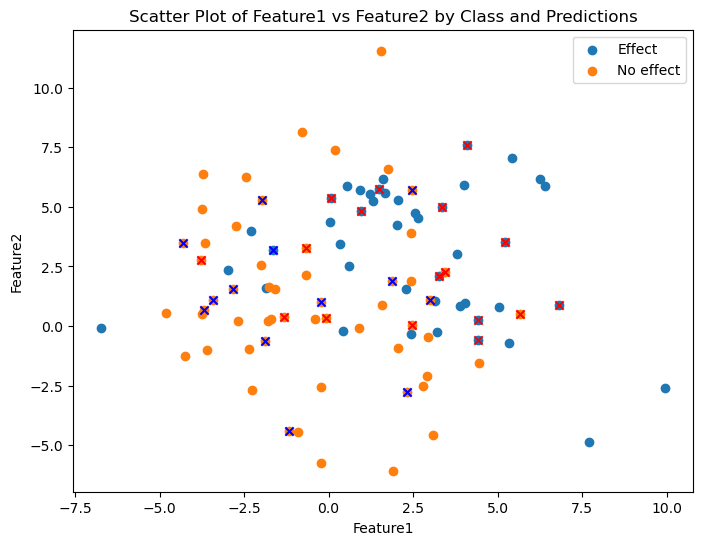

In [57]:
# Plot the data and predictions
plt.figure(figsize=(8, 6))
for label in df['Class'].unique():
    subset = df[df['Class'] == label]
    plt.scatter(subset['Feature1'], subset['Feature2'], label=label)

# Plot the predicted points
for i, pred in enumerate(y_pred):
    plt.scatter(X_test.iloc[i, 0], X_test.iloc[i, 1], marker='x', color='red' if pred == 'Effect' else 'blue')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter Plot of Feature1 vs Feature2 by Class and Predictions')
plt.legend()
plt.show()